### Heat Map code for Vision Zero Paper ###
by Richard Sowers and Daniel Carmody

* Richard Sowers <r-sowers@illinois.edu> <https://publish.illinois.edu/r-sowers/>
* Daniel Carmody <dcarmod2@illinois.edu>


Copyright 2018 University of Illinois Board of Trustees. All Rights Reserved. Licensed under the MIT license.

In [1]:
from matplotlib import pylab as plotter
%matplotlib inline
import osmnx
import networkx
import pandas
import numpy
import time
import itertools
import importlib
import folium
import folium.plugins
import os
from selenium import webdriver
import MAIN_config_hour_of_day as config
#import MAIN_config_seasons as config

In [2]:
Manhattan_center=(40.766045,-73.977784)
#tiles="OpenStreetMap"
#tiles="CartoDBpositron"
#tiles="CartoDBdark_matter"
#tiles="StamenWatercolor"
#tiles="StamenToner"
tiles="StamenTerrain"

In [3]:
d=0
windower=config.windower(d)

Manhattan whole day


In [4]:
eps=0.01 #used for colormap in osmnx.plot_graph; not used for folium

In [5]:
### for folium ###
def getPoint(node,keyword):
    temp=G.node[node]
    (lat,lng,count)=(temp["y"],temp["x"],temp[keyword])
    if count>0:
        return (lat,lng,count)
    else:
        return None

In [6]:
osmnx.config(log_file=True, log_console=True, use_cache=True)
G_raw = osmnx.graph_from_place('Manhattan Island, New York, USA', network_type='drive')

In [7]:
#G=networkx.DiGraph(G_raw)
G=G_raw.copy()

### heat map of accidents ###

In [8]:
accidents_raw=config.accidents()
accidents_raw.head()

,node,datetime
0,370880739,2014-01-16 14:42:00
1,370880739,2014-01-30 12:30:00
2,370880739,2014-09-13 17:35:00
3,370880739,2014-05-15 09:15:00
4,370880739,2014-05-15 01:50:00


In [9]:
accidents=accidents_raw.copy()
accidents=accidents.set_index("node",drop=True)
accidents.head()

,datetime
node,
370880739,2014-01-16 14:42:00
370880739,2014-01-30 12:30:00
370880739,2014-09-13 17:35:00
370880739,2014-05-15 09:15:00
370880739,2014-05-15 01:50:00


In [10]:
temp=accidents.groupby(level="node").size()
networkx.set_node_attributes(G,0,"accident_count")
for node,count in temp.iteritems():
    try:
        G.node[node]["accident_count"]=count
    except Exception:
        pass

### folium heatmap of accidents ###

In [11]:
node=370880739
print(G.node[node])  
print(getPoint(node,"accident_count"))

accident_heat_data=[getPoint(node,"accident_count") for node in G.node]
accident_heat_data=[datum for datum in accident_heat_data if datum is not None]
print(accident_heat_data[:20])

{'y': 40.7016074, 'x': -74.0120124, 'osmid': 370880739, 'accident_count': 32}
(40.7016074, -74.0120124, 32)
[(40.7140611, -73.9975944, 61), (40.7137811, -73.9980743, 13), (40.7096039, -74.0015481, 1), (40.7209205, -73.9937341, 66), (40.7203048, -73.9939823, 342), (40.7200948, -73.9941321, 3), (40.7342008, -73.9748707, 10), (40.7298427, -74.0106787, 44), (40.7069636, -74.0135064, 29), (40.7071446, -74.0139447, 1), (40.7473824, -73.97613, 1), (40.7089925, -74.0121348, 1), (40.7440672, -73.9877451, 84), (40.746618, -73.993813, 77), (40.7478218, -73.9966452, 31), (40.7502203, -74.0023198, 89), (40.7523939, -74.0075669, 30), (40.7113364, -73.9833183, 4), (40.7203782, -74.0059661, 9), (40.7244231, -74.006055, 43)]


In [17]:
fname="accidents"
my_map = folium.Map(Manhattan_center,
                  zoom_start=12,
                  tiles=tiles)
folium.plugins.HeatMap(accident_heat_data,radius=3,blur=1).add_to(my_map)
my_map

In [20]:
my_map.save(fname+".html")
browser=webdriver.Chrome()
browser.get("file://" + os.getcwd()+"/"+fname+".html")
browser.set_window_size(500,750)
browser.save_screenshot(fname+".png")
browser.quit()

WebDriverException: Message: unknown error: cannot get automation extension
from chrome not reachable
  (Session info: chrome=67.0.3396.99)
  (Driver info: chromedriver=2.27.440174 (e97a722caafc2d3a8b807ee115bfb307f7d2cfd9),platform=Mac OS X 10.12.6 x86_64)


### osmnx.plot_graph for accidents ###

In [21]:
numpy.random.seed(0)
for node in G.node:
    G.node[node]["accident_count"]+=eps*numpy.random.random()

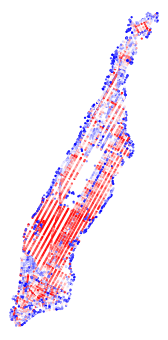

In [22]:
accident_colors = osmnx.get_node_colors_by_attr(G, "accident_count",
                                                cmap="bwr")
temp=osmnx.plot_graph(G, node_color=accident_colors, node_size=5,
                 node_zorder=3,edge_color="#FFFFFF")

### heat maps of origins and destinations ###

In [23]:
trips_raw=config.trips()
trips_raw.head()

,origin_datetime,destination_datetime,origin_node,destination_node
0,2016-03-16 10:39:00,2016-03-16 10:57:00,42435654,42454325
1,2016-03-04 22:20:00,2016-03-04 22:25:00,42429971,42440009
2,2016-03-29 16:36:00,2016-03-29 16:42:00,42438800,42448257
3,2016-03-13 03:48:00,2016-03-13 03:53:00,42444909,42435642
4,2016-03-24 18:29:00,2016-03-24 18:39:00,5147972303,42439440


In [24]:
trips=trips_raw.copy()
trips=trips.set_index(["origin_node","destination_node"],drop=True)
trips.head()

,,origin_datetime,destination_datetime
origin_node,destination_node,,
42435654,42454325,2016-03-16 10:39:00,2016-03-16 10:57:00
42429971,42440009,2016-03-04 22:20:00,2016-03-04 22:25:00
42438800,42448257,2016-03-29 16:36:00,2016-03-29 16:42:00
42444909,42435642,2016-03-13 03:48:00,2016-03-13 03:53:00
5147972303,42439440,2016-03-24 18:29:00,2016-03-24 18:39:00


In [25]:
temp=trips.groupby(level="origin_node").size()
networkx.set_node_attributes(G,0,"origin_count")
for node,count in temp.iteritems():
    try:
        G.node[node]["origin_count"]=count
    except Exception:
        pass

### folium for origins ###

In [26]:
node=370880739
print(G.node[node])    
print(getPoint(node,"origin_count"))

origin_heat_data=[getPoint(node,"origin_count") for node in G.node]
origin_heat_data=[datum for datum in origin_heat_data if datum is not None]
print(origin_heat_data[:50])

{'y': 40.7016074, 'x': -74.0120124, 'osmid': 370880739, 'accident_count': 32.008121854001814, 'origin_count': 62}
(40.7016074, -74.0120124, 62)
[(40.7140611, -73.9975944, 19), (40.7137811, -73.9980743, 7), (40.7096039, -74.0015481, 1), (40.7209205, -73.9937341, 88), (40.7203048, -73.9939823, 47), (40.7200948, -73.9941321, 20), (40.7342008, -73.9748707, 9), (40.7069636, -74.0135064, 17), (40.7071446, -74.0139447, 3), (40.7473824, -73.97613, 3), (40.7427908, -73.972473, 14), (40.7089925, -74.0121348, 9), (40.7440672, -73.9877451, 212), (40.746618, -73.993813, 216), (40.7048817, -74.0164164, 19), (40.7478218, -73.9966452, 57), (40.7502203, -74.0023198, 185), (40.7523939, -74.0075669, 1), (40.710816, -73.983255, 1), (40.7203782, -74.0059661, 1), (40.7204244, -74.0064195, 1), (40.7204501, -74.006671, 5), (40.7256907, -74.0058541, 21), (40.7250366, -74.0059578, 3), (40.738185, -73.974138, 1), (40.7200755, -74.0056591, 15), (40.7216124, -73.9934649, 78), (40.7207656, -74.0100069, 191), (40.70

In [27]:
fname="origins"
my_map = folium.Map(Manhattan_center,
                  zoom_start=12,
                  tiles=tiles)
folium.plugins.HeatMap(origin_heat_data,radius=3,blur=1).add_to(my_map)
my_map

In [28]:
my_map.save(fname+".html")
browser=webdriver.Chrome()
browser.get(os.getcwd()+"\\"+fname+".html")
browser.set_window_size(500,750)
browser.save_screenshot(fname+".png")
browser.quit()

WebDriverException: Message: unknown error: unhandled inspector error: {"code":-32000,"message":"Cannot navigate to invalid URL"}
  (Session info: chrome=67.0.3396.99)
  (Driver info: chromedriver=2.27.440174 (e97a722caafc2d3a8b807ee115bfb307f7d2cfd9),platform=Mac OS X 10.12.6 x86_64)


### osmnx.plot_graph for origins ###

In [ ]:
#slightly randomize so that can compute quantiles
numpy.random.seed(0)
for node in G.node:
    G.node[node]["origin_count"]+=eps*numpy.random.random()

In [ ]:
origin_colors = osmnx.get_node_colors_by_attr(G,
                                              "origin_count", cmap="coolwarm")
#osmnx.plot_graph(G, fig_height=6, node_color=origin_colors, node_size=1,
#                           node_zorder=2, edge_color='#dddddd')
osmnx.plot_graph(G, node_color=origin_colors,node_size=5,
                 node_zorder=3,edge_color="#FFFFFF")

### folium for destinations ###

In [ ]:
temp=trips.groupby(level="destination_node").size()
networkx.set_node_attributes(G,0,"destination_count")
for node,count in temp.iteritems():
    try:
        G.node[node]["destination_count"]=count
    except Exception:
        pass

In [29]:
node=370880739
print(G.node[node])    
print(getPoint(node,"destination_count"))

destination_heat_data=[getPoint(node,"destination_count") for node in G.node]
destination_heat_data=[datum for datum in destination_heat_data if datum is not None]
print(destination_heat_data[:50])

{'y': 40.7016074, 'x': -74.0120124, 'osmid': 370880739, 'accident_count': 32.008121854001814, 'origin_count': 62}


KeyError: 'destination_count'

In [30]:
fname="destinations"
my_map = folium.Map(Manhattan_center,
                  zoom_start=12,
                  tiles=tiles)
folium.plugins.HeatMap(destination_heat_data,radius=3,blur=1).add_to(my_map)
my_map

NameError: name 'destination_heat_data' is not defined

In [31]:
my_map.save(fname+".html")
browser=webdriver.Chrome()
browser.get(os.getcwd()+"\\"+fname+".html")
browser.set_window_size(500,750)
browser.save_screenshot(fname+".png")
browser.quit()

WebDriverException: Message: unknown error: unhandled inspector error: {"code":-32000,"message":"Cannot navigate to invalid URL"}
  (Session info: chrome=67.0.3396.99)
  (Driver info: chromedriver=2.27.440174 (e97a722caafc2d3a8b807ee115bfb307f7d2cfd9),platform=Mac OS X 10.12.6 x86_64)


### osmnx.plot_graph for destinations ###

In [28]:
#slightly randomize so that we can compute quantiles
numpy.random.seed(0)
for node in G.node:
    G.node[node]["destination_count"]+=eps*numpy.random.random()

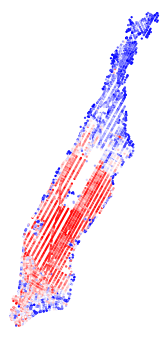

(<Figure size 269.369x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a882aea748>)

In [29]:
destination_colors = osmnx.get_node_colors_by_attr(G, "destination_count", cmap="bwr")
osmnx.plot_graph(G, node_color=destination_colors,node_size=5,
                 node_zorder=3,edge_color="#FFFFFF")

### heat map of pace ###

In [33]:
traveltimes_raw=config.traveltimes()
traveltimes_raw.head()

,begin_node,end_node,datetime,travel_time,num_trips
1403701,42434279,42443674,2012-12-26 23:00:00,14.36930,135
1403702,42434237,42444835,2012-12-26 23:00:00,10.57470,3
1403703,1372888616,42522888,2012-12-26 23:00:00,9.71205,3
1403704,42434196,1773121034,2012-12-26 23:00:00,15.76400,50
1403705,598622198,598622326,2012-12-26 23:00:00,14.67750,1


In [34]:
traveltimes=traveltimes_raw.copy()

In [35]:
traveltimes=traveltimes.set_index(["begin_node","end_node"],drop=True)
traveltimes.head()

,,datetime,travel_time,num_trips
begin_node,end_node,,,
42434279,42443674,2012-12-26 23:00:00,14.36930,135
42434237,42444835,2012-12-26 23:00:00,10.57470,3
1372888616,42522888,2012-12-26 23:00:00,9.71205,3
42434196,1773121034,2012-12-26 23:00:00,15.76400,50
598622198,598622326,2012-12-26 23:00:00,14.67750,1


In [45]:
#average the traveltimes for each edge (in case of multiple trips)
networkx.set_edge_attributes(G,numpy.nan,"pace")
edge_times=traveltimes["travel_time"].groupby(level=["begin_node","end_node"]).mean()

#set pace along each edge
#want color map to reflect high values for slow traffic;
#pace does this
tic=time.clock()
DATA_LIST = []
for ((begin_node,end_node),edge_time) in edge_times.iteritems():
    #print(begin_node,end_node,edge_time)
    try:
        pace=edge_time/G.edges[begin_node,end_node,0]["length"]
        lat1 = G.node[begin_node]["y"]
        lon1 = G.node[begin_node]["x"]
        lat2 = G.node[end_node]["y"]
        lon2 = G.node[end_node]["x"]
        latmid = (lat1 + lat2)/2.
        lonmid = (lon1 + lon2)/2.
        #DATA_LIST.append([lat1,lon1,pace])
        #DATA_LIST.append([lat2,lon2,pace])
        DATA_LIST.append([latmid,lonmid,pace])
    except Exception:
        pass
toc=time.clock()
print(str(toc-tic)+" seconds required")

0.21795900000000756 seconds required


In [46]:
pace_map = folium.Map(Manhattan_center,
                  zoom_start=12,
                  tiles=tiles)
folium.plugins.HeatMap(DATA_LIST,radius=3,blur=1).add_to(pace_map)
pace_map

In [37]:
average_pace=numpy.nanmean([d["pace"] for _,d in G.edges.items()])
print(average_pace)

0.246842972348433


In [38]:
#for coloring reasons,
# fill in unknown paces with average pace
# slightly randomize pace so that we can compute quantiles
numpy.random.seed(0)

tic=time.clock()
for edge,edgedict in G.edges.items():
    edge_pace=edgedict["pace"]
    if numpy.isnan(edge_pace):
        edge_pace=average_pace
    G.edges[edge]["pace"]=edge_pace+eps*numpy.random.random()
toc=time.clock()
print(str(toc-tic)+" seconds required")

0.0975129999999993 seconds required


In [40]:
G.edge

OutMultiEdgeView([(1773060097, 42437559, 0), (1773060097, 1773060099, 0), (1773060099, 588455742, 0), (1773060099, 1773055865, 0), (278609934, 278642478, 0), (278609934, 278609863, 0), (278609934, 3884569924, 0), (278609934, 42422283, 0), (42434589, 374494595, 0), (42434589, 42434559, 0), (1773076509, 1773076778, 0), (1773076511, 42429752, 0), (1773076511, 42429754, 0), (1773076511, 1773076509, 0), (1773076513, 42432184, 0), (1773076513, 1773076511, 0), (42451018, 42439191, 0), (246890579, 42440532, 0), (246890579, 246857084, 0), (4149936235, 42446622, 0), (4149936235, 4149936245, 0), (4149936245, 42436178, 0), (4149936245, 42436181, 0), (3834921106, 42449685, 0), (42434722, 42434589, 0), (42451126, 4950763055, 0), (42451126, 370912817, 0), (42434780, 42434722, 0), (1506902240, 42456888, 0), (42434800, 42428220, 0), (42434800, 42429874, 0), (42434807, 42439842, 0), (42434807, 42434810, 0), (246923513, 42451375, 0), (246923513, 246858654, 0), (42434810, 42435633, 0), (42434821, 42430600

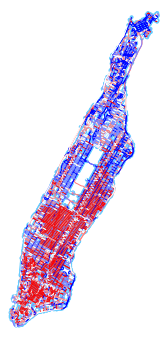

(<Figure size 269.369x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a18648160>)

In [39]:
speed_colors = osmnx.get_edge_colors_by_attr(G,"pace",cmap="bwr")
osmnx.plot_graph(G, edge_color=speed_colors)